In [1]:
import pdblp
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from pandas.plotting import table
from PIL import Image

from xbbg import blp
from datetime import datetime, timedelta



In [ ]:
# ------------------------------------------------------------------------- BASE VOL ADJUSTED RR ------------------------------------------------------------------------------

def BaseVolAdjRR(ccy, RRcode, tenor, timeHist):

   
    day = timeHist

    start_date = (datetime.today() - timedelta(days=(day * 2))).strftime('%Y-%m-%d')
    end_date = datetime.today().strftime('%Y-%m-%d')


    # Implied Vol
    ticker_IV = f"{ccy}V{tenor} BGN Curncy"
    field = "PX_LAST"

    # Fetch the data for each tenor
    data_IV = blp.bdh(
        tickers=ticker_IV,
        flds=field,
        start_date=start_date,
        end_date=end_date

    )
    data_IV = data_IV.tail(day)



    # Risk Reversal 
    ticker_RR = f"{RRcode}RR{tenor} BGN Curncy" # !!!!!!!!!!! ADJUST CCY for match
    field = "PX_LAST"

    # Fetch the data for each tenor
    data_RR = blp.bdh(
        tickers=ticker_RR,
        flds=field,
        start_date=start_date,
        end_date=end_date
    )
    data_RR = data_RR.tail(day)





    combined_data = pd.concat([data_IV, data_RR], axis=1)

    # Optionally, rename the columns to distinguish between the two DataFrames
    combined_data.columns = [f'V{tenor}', f'25r{tenor}']

    return combined_data



CCY    == RRCode
-----------------
USDJPY == USJY \ 
EURUSD == EUUS \
USDCNH == USCG \
USDMXN == USMP \
AUDUSD == ADUS \
GBPUSD == BPUS \
USDCHF == USSF \

XAUUSD == XUUS 

In [36]:
ccy = 'EURUSD'
RRcode = 'EUUS'
tenor = '3M'
timeHist = 365

df_BaseVolAdjRR = BaseVolAdjRR(ccy, RRcode, tenor, timeHist)

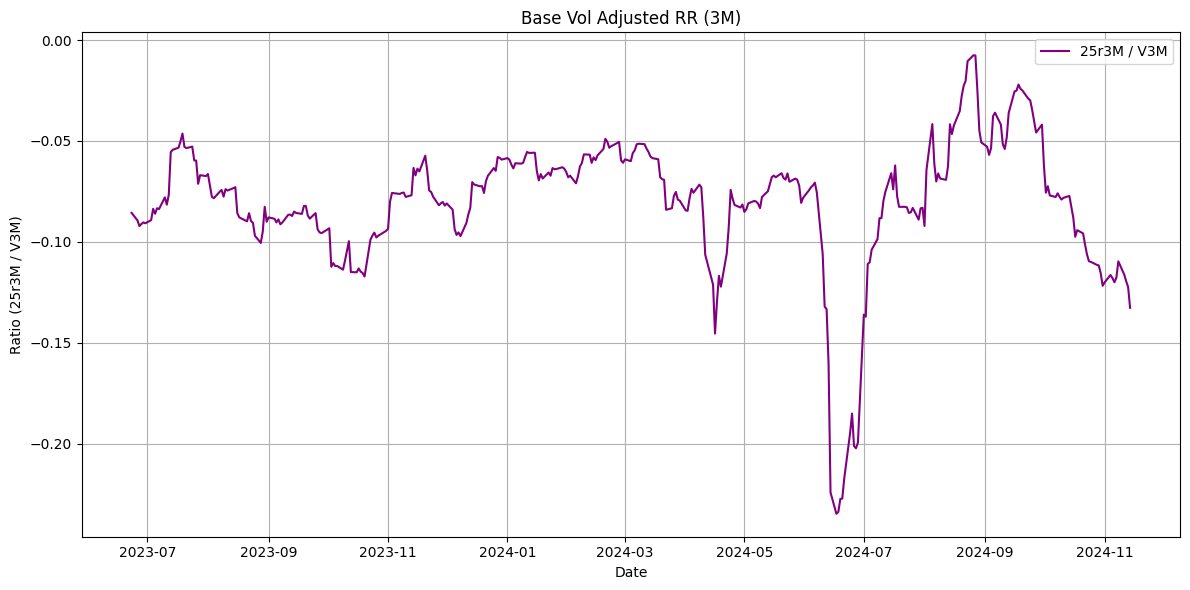

In [37]:
# Calculate the ratio of '25r3M' to 'V3M'
df_BaseVolAdjRR['Ratio'] = df_BaseVolAdjRR['25r3M'] / df_BaseVolAdjRR['V3M']

# Plot the ratio over time
plt.figure(figsize=(12, 6))
plt.plot(df_BaseVolAdjRR.index, df_BaseVolAdjRR['Ratio'], color='purple', label='25r3M / V3M')
plt.xlabel('Date')
plt.ylabel('Ratio (25r3M / V3M)')
plt.title('Base Vol Adjusted RR (3M)')
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True)
plt.show()

CCY    == RRCode
-----------------
USDJPY == USJY \ 
EURUSD == EUUS \
USDCNH == USCG \
USDMXN == USMP \
AUDUSD == ADUS \
GBPUSD == BPUS \
USDCHF == USSF \

XAUUSD == XUUS 

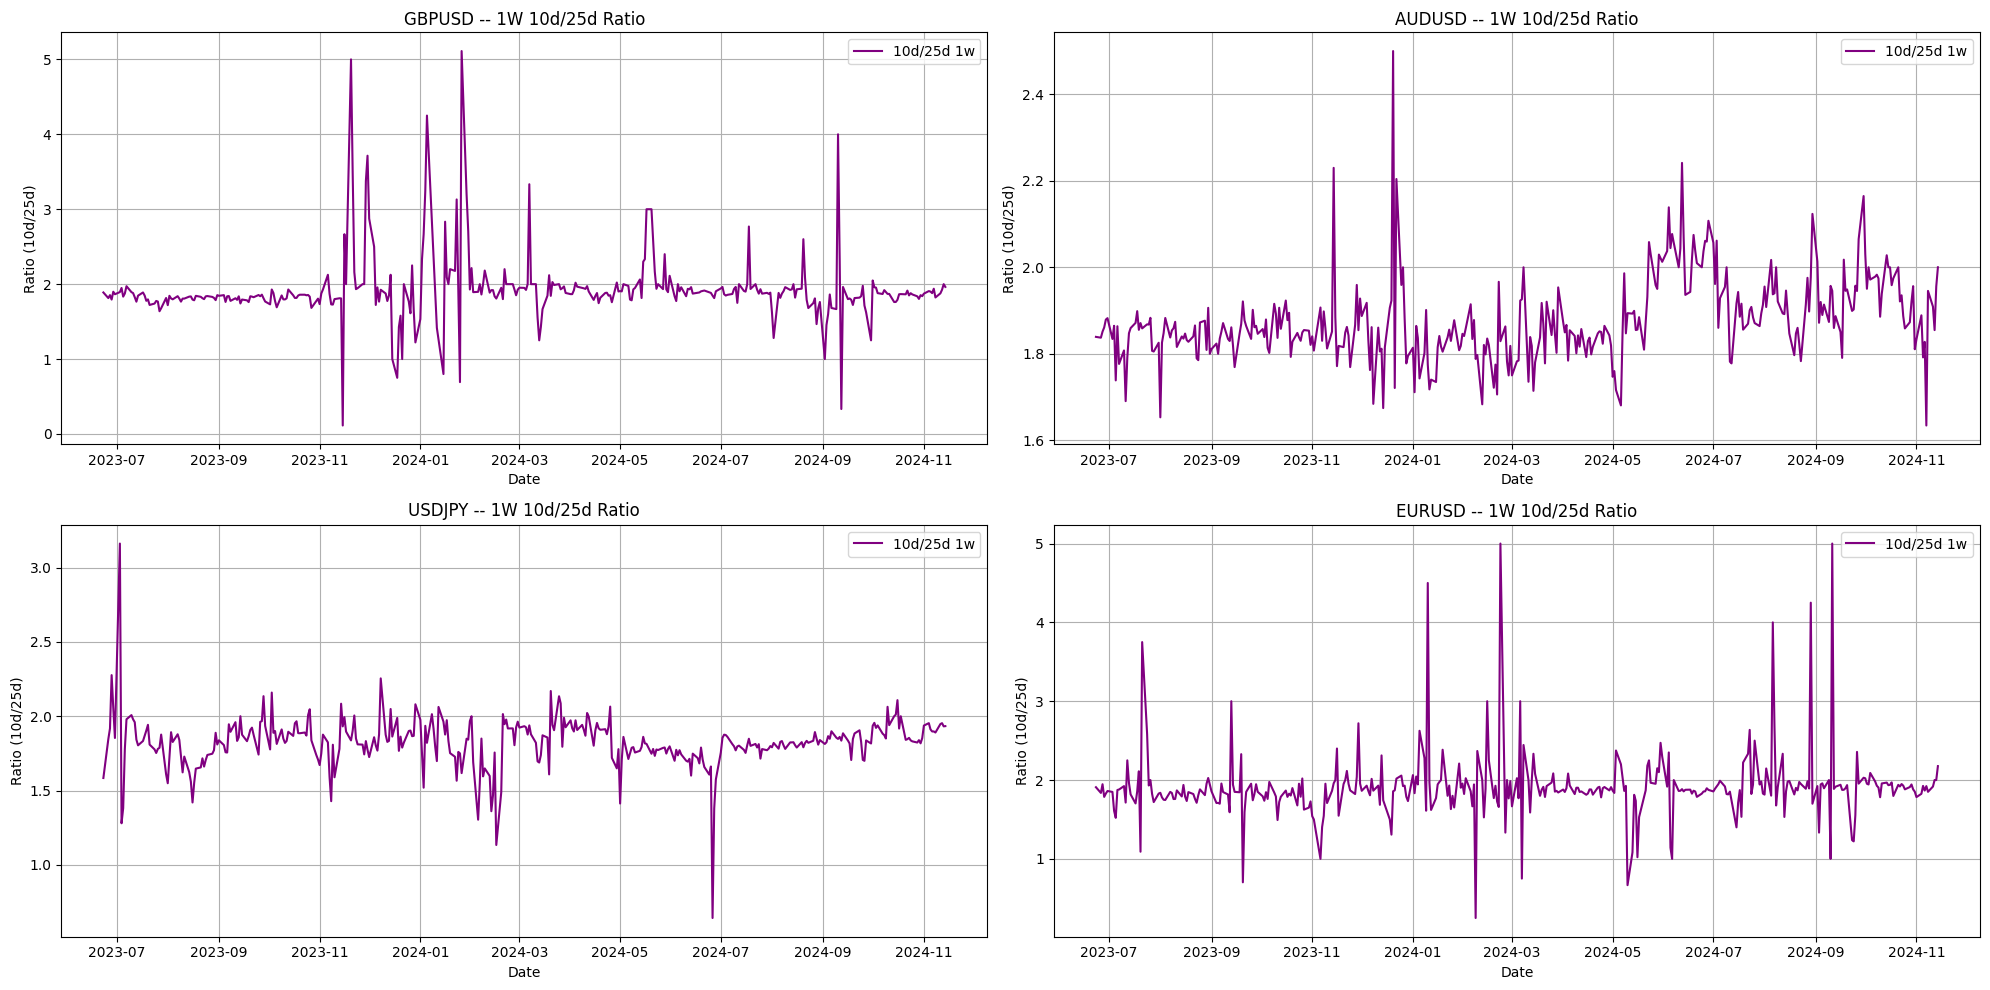

In [ ]:

ccy_pairs = ['GBPUSD', 'AUDUSD', 'USDJPY', 'EURUSD']


timeHist = 365
day = timeHist
start_date = (datetime.today() - timedelta(days=(day * 2))).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')


fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten() 


for i, ccy in enumerate(ccy_pairs):
    
    ticker_IV = f"{ccy}10R1W BGN Curncy"
    ticker_IV2 = f"{ccy}25R1W BGN Curncy"
    
   
    data_IV = blp.bdh(tickers=ticker_IV, flds="PX_LAST", start_date=start_date, end_date=end_date).tail(day)
    data_IV2 = blp.bdh(tickers=ticker_IV2, flds="PX_LAST", start_date=start_date, end_date=end_date).tail(day)
    
    
    combined_data = pd.concat([data_IV, data_IV2], axis=1)
    combined_data.columns = [f'{ccy}10R1W', f'{ccy}25R1W']
    combined_data['Ratio'] = combined_data[f'{ccy}10R1W'] / combined_data[f'{ccy}25R1W']
    
    
    combined_data = combined_data[(combined_data['Ratio'] >= 0) & (combined_data['Ratio'] <= 10)]
    
    
    ax = axes[i]
    ax.plot(combined_data.index, combined_data['Ratio'], color='purple', label='10d/25d 1w')
    ax.set_title(f'{ccy} -- 1W 10d/25d Ratio')
    ax.set_xlabel('Date')
    ax.set_ylabel('Ratio (10d/25d)')
    ax.legend(loc='upper right')
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



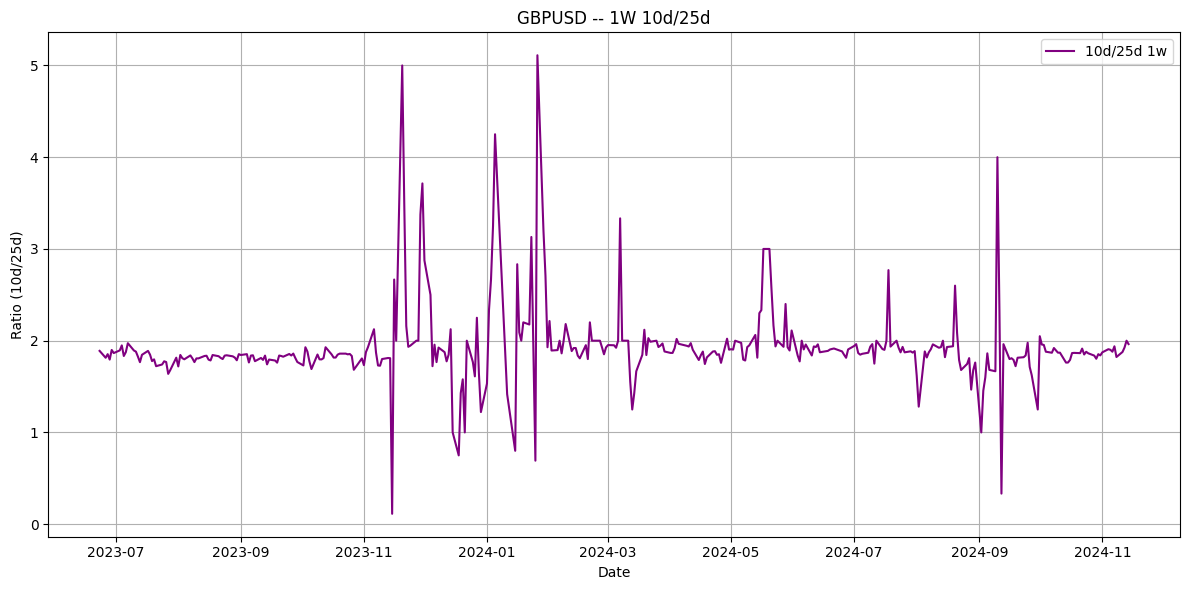

In [60]:
# Calculate the ratio of '25r3M' to 'V3M'
combined_data['Ratio'] = combined_data[f'{ccy}10R1W'] / combined_data[f'{ccy}25R1W']

combined_data = combined_data[combined_data['Ratio'] >= 0]

combined_data = combined_data[combined_data['Ratio'] <= 10]

# Plot the ratio over time
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Ratio'], color='purple', label='10d/25d 1w')
plt.xlabel('Date')
plt.ylabel('Ratio (10d/25d)')
plt.title(f'{ccy} -- 1W 10d/25d')
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.grid(True)
plt.show()